In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Understanding

In [2]:
# Read csv from subfolder into dataframe
titanic = pd.read_csv('titanic//train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Preprocessing

In [5]:
# Group certain columns to store to a list
titanic_grp = ['pclass','age', 'survival', 'sex']

In [6]:
#replace 0 to 'Dead', 1 to 'Survived ' in Survived column
survival = {0: "Dead", 1: "Survived"}
titanic.replace({'Survived' : survival}, inplace=True)

In [7]:
titanic_grp

['pclass', 'age', 'survival', 'sex']

In [8]:
#Check any missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#Fill missing values
titanic['Embarked'].fillna('Unknown',inplace=True)
titanic['Age'].fillna(0, inplace=True)
titanic['Cabin'].fillna('Unknown', inplace=True)

In [10]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Dead,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,Dead,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [12]:
# Convert all columns to lower case
titanic.columns = titanic.columns.str.lower()
# Rename survived column to survival
titanic.rename(columns={'survived': 'survival','passengerid': 'passengerID'}, inplace=True)
titanic = titanic[['passengerID', 'name','pclass','survival','age','sex','embarked','sibsp','parch','fare','ticket','cabin']]

In [13]:
titanic.head()

,passengerID,name,pclass,survival,age,sex,embarked,sibsp,parch,fare,ticket,cabin
0,1,"Braund, Mr. Owen Harris",3,Dead,22.0,male,S,1,0,7.2500,A/5 21171,Unknown
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,Survived,38.0,female,C,1,0,71.2833,PC 17599,C85
2,3,"Heikkinen, Miss. Laina",3,Survived,26.0,female,S,0,0,7.9250,STON/O2. 3101282,Unknown
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,Survived,35.0,female,S,1,0,53.1000,113803,C123
4,5,"Allen, Mr. William Henry",3,Dead,35.0,male,S,0,0,8.0500,373450,Unknown


In [14]:
# Check if there is any duplicate data
titanic.loc[titanic.duplicated(),:]

,passengerID,name,pclass,survival,age,sex,embarked,sibsp,parch,fare,ticket,cabin


In [15]:
# binning function to convert Age to category group. unknown,young,adult,old
def binning(col, cut_points, labels=None):
  minval = col.min()
  maxval = col.max()
  break_points = [minval] + cut_points + [maxval]
  if not labels:
    labels = range(len(cut_points)+1)
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

cut_points = [1, 20, 50 ]
labels = ["Unknown", "Young", "Adult", "Old"]
titanic['age'] = binning(titanic['age'], cut_points, labels)

In [16]:
titanic.head(15)

,passengerID,name,pclass,survival,age,sex,embarked,sibsp,parch,fare,ticket,cabin
0,1,"Braund, Mr. Owen Harris",3,Dead,Adult,male,S,1,0,7.2500,A/5 21171,Unknown
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,Survived,Adult,female,C,1,0,71.2833,PC 17599,C85
2,3,"Heikkinen, Miss. Laina",3,Survived,Adult,female,S,0,0,7.9250,STON/O2. 3101282,Unknown
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,Survived,Adult,female,S,1,0,53.1000,113803,C123
4,5,"Allen, Mr. William Henry",3,Dead,Adult,male,S,0,0,8.0500,373450,Unknown
5,6,"Moran, Mr. James",3,Dead,Unknown,male,Q,0,0,8.4583,330877,Unknown
6,7,"McCarthy, Mr. Timothy J",1,Dead,Old,male,S,0,0,51.8625,17463,E46
7,8,"Palsson, Master. Gosta Leonard",3,Dead,Young,male,S,3,1,21.0750,349909,Unknown
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",3,Survived,Adult,female,S,0,2,11.1333,347742,Unknown
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",2,Survived,Young,female,C,1,0,30.0708,237736,Unknown


## Exploratory Data Analysis

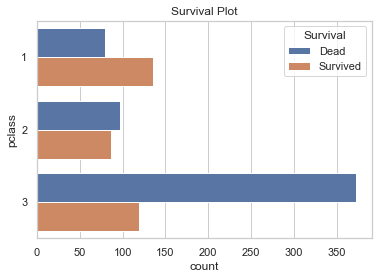

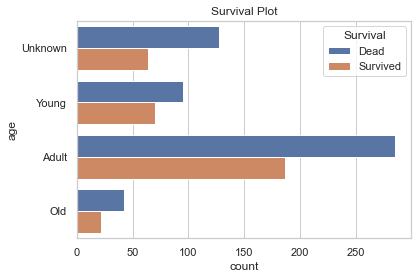

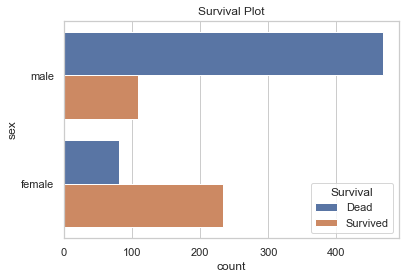

In [17]:
for grp in ['pclass','age', 'sex']:
    sns.set(style="whitegrid")
    ax = sns.countplot(y= grp, hue='survival', data=titanic)
    plt.ylabel(grp)
    plt.title('Survival Plot')
    plt.legend(title='Survival', labels=['Dead','Survived'])
    plt.show()

## Association Rule - Apriori

In [20]:
titanic_survival = titanic[titanic_grp]

In [21]:
# By selecting only specific columns from an existing DataFrame
titanic_survival

,pclass,age,survival,sex
0,3,Adult,Dead,male
1,1,Adult,Survived,female
2,3,Adult,Survived,female
3,1,Adult,Survived,female
4,3,Adult,Dead,male
...,...,...,...,...
886,2,Adult,Dead,male
887,1,Young,Survived,female
888,3,Unknown,Dead,female
889,1,Adult,Survived,male


In [22]:
records = []
for i in range(0, titanic_survival.shape[0]):
    records.append([str(titanic_survival.values[i,j]) for j in range(0, titanic_survival.shape[1])])
# dataset = titanic_survival.to_xarray()

records[0]

['3', 'Adult', 'Dead', 'male']

In [23]:
#df1 = pd.DataFrame(records,columns=['embarked','pclass','age','survival','gender'])
#onehotencoder
#titanic linear model onehotencoder, linear model, categorical response
#df1.groupby(['pclass','survival']).count()['gender']

In [24]:
# turn dataset into a binary array or matrix. True or false values
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,1,2,3,Adult,Dead,Old,Survived,Unknown,Young,female,male
0,False,False,True,True,True,False,False,False,False,False,True
1,True,False,False,True,False,False,True,False,False,True,False
2,False,False,True,True,False,False,True,False,False,True,False
3,True,False,False,True,False,False,True,False,False,True,False
4,False,False,True,True,True,False,False,False,False,False,True


In [25]:
#mini support 0.02 -0.05
from mlxtend.frequent_patterns import apriori, association_rules
result = apriori(df, min_support=0.02, use_colnames=te.columns_)
result

,support,itemsets
0,0.242424,(1)
1,0.206510,(2)
2,0.551066,(3)
3,0.528620,(Adult)
4,0.616162,(Dead)
...,...,...
107,0.097643,"(Unknown, Dead, male, 3)"
108,0.025814,"(Dead, female, Young, 3)"
109,0.066218,"(Dead, Young, male, 3)"
110,0.032548,"(Unknown, female, Survived, 3)"


In [26]:
te.columns_

['1',
 '2',
 '3',
 'Adult',
 'Dead',
 'Old',
 'Survived',
 'Unknown',
 'Young',
 'female',
 'male']

Empty Data Frame For Metric Type :  antecedent support  on Threshold :  0.7
['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
-------------------------------------
Configuration :  support  :  0.5
-------------------------------------
  antecedents consequents  antecedent support  consequent support   support  \
0      (Dead)      (male)            0.616162            0.647587  0.525253   
1      (male)      (Dead)            0.647587            0.616162  0.525253   

   confidence      lift  leverage  conviction  
0    0.852459  1.316362  0.126234    2.388577  
1    0.811092  1.316362  0.126234    2.031878  


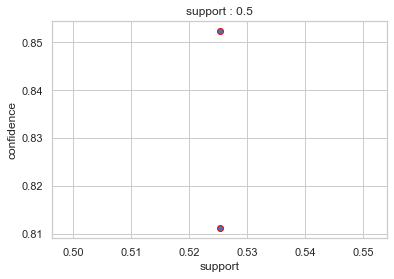

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
-------------------------------------
Configuration :  confidence  :  0.8
-------------------------------------
              antecedents consequents  antecedent support  consequent support  \
0                  (Dead)      (male)            0.616162            0.647587   
1                  (male)      (Dead)            0.647587            0.616162   
2               (Dead, 1)      (male)            0.089787            0.647587   
3         (Old, Survived)         (1)            0.024691            0.242424   
4             (female, 1)  (Survived)            0.105499            0.383838   
5               (Dead, 2)      (male)            0.108866            0.647587   
6               (2, male)      (Dead)            0.121212            0.616162   
7             (female, 2)  (Survived)            0.085297            0.383838   
8           (2, Survived)    (fe

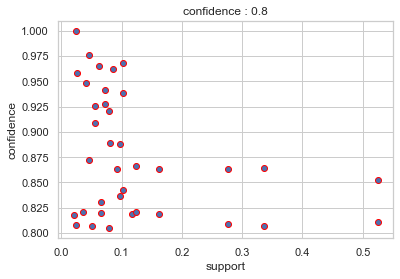

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
-------------------------------------
Configuration :  conviction  :  3
-------------------------------------
              antecedents consequents  antecedent support  consequent support  \
0               (Dead, 1)      (male)            0.089787            0.647587   
1         (Old, Survived)         (1)            0.024691            0.242424   
2             (female, 1)  (Survived)            0.105499            0.383838   
3               (Dead, 2)      (male)            0.108866            0.647587   
4             (female, 2)  (Survived)            0.085297            0.383838   
5           (2, Survived)    (female)            0.097643            0.352413   
6           (Dead, Young)         (3)            0.106622            0.551066   
7          (female, Dead)         (3)            0.090909            0.551066   
8             (Dead, Old)      (ma

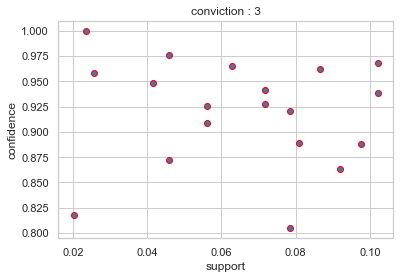

In [27]:
config = [
    ('antecedent support', 0.7),
    ('support', 0.5),
    ('confidence', 0.8),
    ('conviction', 3)
]

for metric_type, th in config:
    rules = association_rules(result, metric=metric_type, min_threshold=th)
    
    if rules.empty:
        print ('Empty Data Frame For Metric Type : ',metric_type,' on Threshold : ',th)
        continue
        
    print (rules.columns.values)
    print ('-------------------------------------')
    print ('Configuration : ', metric_type, ' : ', th)
    print ('-------------------------------------')
    print (rules)

    support = rules[['support']].values
    confidence = rules[['confidence']].values

    plt.scatter(support, confidence, edgecolors='red')
    plt.xlabel('support')
    plt.ylabel('confidence')
    plt.title(metric_type+' : '+str(th))
    plt.show()

In [28]:
# Display only 'antecedents','consequents','confidence','support','lift'
rules = rules[['antecedents','consequents','confidence','support','lift']]
# Sort by highest confidence
rules = rules.sort_values(['confidence'], ascending =[False])
#Display Top 20 rules
rules.head(20)

,antecedents,consequents,confidence,support,lift
12,"(Dead, Old, 1)",(male),1.000000,0.023569,1.544194
8,"(Dead, Old)",(male),0.976190,0.046016,1.507428
2,"(female, 1)",(Survived),0.968085,0.102132,2.522116
11,"(female, 1, Adult)",(Survived),0.965517,0.062851,2.515426
0,"(Dead, 1)",(male),0.962500,0.086420,1.486287
18,"(female, Dead, Young)",(3),0.958333,0.025814,1.739053
10,"(Dead, Adult, 1)",(male),0.948718,0.041526,1.465005
14,"(2, Adult, male)",(Dead),0.941176,0.071829,1.527483
3,"(Dead, 2)",(male),0.938144,0.102132,1.448677
13,"(Dead, Adult, 2)",(male),0.927536,0.071829,1.432296


In [29]:
#rules = association_rules (result, metric='support', min_threshold=0.1)
#rules[rules['confidence'] == rules['confidence'].min()]


In [30]:
#rules[rules['confidence'] == rules['confidence'].max()]

In [31]:
#rules[(rules['confidence'] >=0.8)].sort_values(by='confidence', ascending=False)